In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy as np
import matplotlib.font_manager
import matplotlib.legend
from matplotlib.font_manager import FontProperties
import os
import pandas as pd
from mlxtend.plotting import plot_learning_curves,plot_confusion_matrix
import numpy as np
import io
import requests
from sklearn.linear_model import Ridge
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.model_selection import ShuffleSplit
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,validation_curve,learning_curve
from sklearn.metrics import log_loss, auc, roc_auc_score, accuracy_score,plot_confusion_matrix, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier as gbm
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import GridSearchCV  
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
import io
import timeit
import itertools
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

## Functions for Algorithm

In [234]:
def time_taken_algorithm(algorithm, time_taken, final_score):
    start = time.perf_counter()
    final_state, top_score = algorithm()
    end = time.perf_counter()
    time_taken.append(end - start)
    final_score.append(top_score)   

def import_data():

    X1 = X
    Y1 = y
    X2= X_cus
    Y2= y_cus

    return X1,Y1,X2,Y2    
    
def knaps_prob(new_size):
    weights = list(np.random.randint(low = 1, high = 100, size = new_size))
    values = list(np.random.randint(low = 1, high = 100, size = new_size))
    knapsack = mlrose.DiscreteOpt(length = new_size,fitness_fn = mlrose.Knapsack(weights,values,0.8))
    
    time_taken_algorithm(lambda : mlrose.random_hill_climb(problem=knapsack,max_attempts=10,max_iters=100)
                         ,algorithm_RHC_time, algorithm_RHC_score)
    
    time_taken_algorithm(lambda : mlrose.simulated_annealing(problem=knapsack, max_attempts=10,max_iters=100,
                            schedule=mlrose.GeomDecay(decay=0.95)), 
                         algorithm_anneal_time, algorithm_anneal_score)
    time_taken_algorithm(lambda : mlrose.genetic_alg(problem=knapsack, max_attempts=10,pop_size=200,max_iters=100,
                              mutation_prob=.1), 
                   algorithm_genetic_time, algorithm_genetic_score)
    time_taken_algorithm(lambda : mlrose.mimic(problem=knapsack, max_attempts=10, keep_pct=.40, fast_mimic=True,max_iters=100), 
                   algorithm_mimic_time, algorithm_mimic_score)
def four_peak(new_size):
    fourpeak = mlrose.DiscreteOpt(length = new_size,fitness_fn = mlrose.FourPeaks(t_pct=0.6))
    print ("Four Peak Problem with ", new_size, " points")
    time_taken_algorithm(lambda : mlrose.random_hill_climb(problem=fourpeak, max_attempts=10,max_iters=100),algorithm_RHC_time, algorithm_RHC_score)
    time_taken_algorithm(lambda : mlrose.simulated_annealing(problem=fourpeak,max_iters=100, max_attempts=10,schedule=mlrose.GeomDecay(decay=0.95)), 
                   algorithm_anneal_time, algorithm_anneal_score)
    time_taken_algorithm(lambda : mlrose.genetic_alg(problem=fourpeak, max_attempts=10,pop_size=200,max_iters=100,
                              mutation_prob=.1), 
                   algorithm_genetic_time, algorithm_genetic_score)
    time_taken_algorithm(lambda : mlrose.mimic(problem=fourpeak, max_attempts=10, keep_pct=.40, fast_mimic=True), 
                   algorithm_mimic_time, algorithm_mimic_score)
def continuous_peaks(new_size):
    continuous_peak = mlrose.DiscreteOpt(length = new_size,fitness_fn = mlrose.ContinuousPeaks(t_pct=0.4))
    print ("Continuous Peaks Problem with ", new_size, " points")
    time_taken_algorithm(lambda : mlrose.random_hill_climb(problem=continuous_peak, max_attempts=10),algorithm_RHC_time, algorithm_RHC_score)
    time_taken_algorithm(lambda : mlrose.simulated_annealing(problem=continuous_peak, max_attempts=10,schedule=mlrose.GeomDecay(decay=0.95)), 
                   algorithm_anneal_time, algorithm_anneal_score)
    time_taken_algorithm(lambda : mlrose.genetic_alg(problem=continuous_peak, max_attempts=10,pop_size=200,
                              mutation_prob=.1), 
                   algorithm_genetic_time, algorithm_genetic_score)
    time_taken_algorithm(lambda : mlrose.mimic(problem=continuous_peak, max_attempts=10, keep_pct=.40, fast_mimic=True), 
                   algorithm_mimic_time, algorithm_mimic_score)
def final_curve(algorithm):
    if algorithm=="knap":
        point_range = range(10,300,5)

        for p in point_range:
            knaps_prob(p)

        fig, ax1 = plt.subplots()
        plt.rcParams["figure.figsize"] = (8,5)
        plt.title("Knapsack Time")
        ax1.set_xlabel('Array Length')
        ax1.set_ylabel('Time')
        #ax1.plot(point_range,algorithm_RHC_time,'o-',point_range,algorithm_anneal_time,'o-')
        ax1.plot(point_range,algorithm_RHC_time,'o-',label="hill climb")
        ax1.plot(point_range,algorithm_anneal_time,'o-',label="simulated annealing")
        ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.05),fancybox=True, shadow=True, ncol=5)
        #ax1.legend(["hill climb", "simulated annealing",],bbox_to_anchor=(1.05, .8), loc='upper left', ncol=2)
        ax2 = ax1.twinx()
        plt.figure(figsize=(6,4))
        ax2.set_ylabel('Time (Mimic/Genetic)')  
        ax2.plot(point_range,algorithm_genetic_time,'r-s',color='green',label="genetic")
        ax2.plot(point_range,algorithm_mimic_time,'r-s',color='red',label="mimic")
        ax2.legend(loc='upper center', bbox_to_anchor=(0.9, -0.05),fancybox=True, shadow=True, ncol=5)
        #ax2.legend(["genetic algorithm","mimic"],bbox_to_anchor=(1.05, .76), loc='upper left', ncol=2)
        fig.tight_layout() 
        plt.show()

        plt.plot(point_range,algorithm_RHC_score,'o-',label="hill climb")
        plt.plot(point_range,algorithm_anneal_score,'o-',label="simulated annealing")
        plt.plot(point_range,algorithm_genetic_score,'o-',label="genetic")
        plt.plot(point_range,algorithm_mimic_score,'o-',label="mimic")
        plt.title("Knapsack Scores")
        plt.xlabel("Number of elements in state vector")
        plt.ylabel("Highest Score")
        #plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
        plt.show()
    elif algorithm=="four_peaks" :
        point_range = range(10,300,5)

        for p in point_range:
            four_peak(p)

        fig, ax1 = plt.subplots()
        plt.rcParams["figure.figsize"] = (8,5)
        plt.title("Four Peak Time")
        ax1.set_xlabel("Number of elements in state vector")
        ax1.set_ylabel("Time")
        #ax1.plot(point_range,algorithm_RHC_time,'o-',point_range,algorithm_anneal_time,'o-')
        ax1.plot(point_range,algorithm_RHC_time,'o-',label="hill climb")
        ax1.plot(point_range,algorithm_anneal_time,'o-',label="simulated annealing")
        ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
        #ax1.legend(["hill climb", "simulated annealing",],bbox_to_anchor=(1.05, .8), loc='upper left', ncol=2)
        ax2 = ax1.twinx() 
        plt.figure(figsize=(6,4))
        ax2.set_ylabel('Time (Mimic/Genetic)')  
        ax2.plot(point_range,algorithm_genetic_time,'r-s',color='green',label="genetic")
        ax2.plot(point_range,algorithm_mimic_time,'r-s',color='red',label="mimic")
        ax2.legend(loc='upper center', bbox_to_anchor=(0.9, -0.05),fancybox=True, shadow=True, ncol=5)
        fig.tight_layout() 
        plt.show()

        #plt.plot(point_range,algorithm_RHC_score,'o-',point_range,algorithm_anneal_score,'o-', point_range,algorithm_genetic_score,'o-',point_range,algorithm_mimic_score,'o-')
        plt.plot(point_range,algorithm_RHC_score,'o-',label="hill climb")
        plt.plot(point_range,algorithm_anneal_score,'o-',label="simulated annealing")
        plt.plot(point_range,algorithm_genetic_score,'o-',label="genetic")
        plt.plot(point_range,algorithm_mimic_score,'o-',label="mimic")
        plt.title("Four Peak Scores")
        plt.xlabel("Number of elements in state vector")
        plt.ylabel("Highest Score")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
        #plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
        plt.show()
    elif algorithm=="continuous_peaks" :
        point_range = range(10,300,5)

        for p in point_range:
            continuous_peaks(p)

        fig, ax1 = plt.subplots()
        plt.rcParams["figure.figsize"] = (8,5)
        plt.title("Continuous Peak Time")
        ax1.set_xlabel("Number of elements in state vector")
        ax1.set_ylabel("Time")
        ax1.plot(point_range,algorithm_RHC_time,'o-',label="hill climb")
        ax1.plot(point_range,algorithm_anneal_time,'o-',label="simulated annealing")
        ax1.legend(loc='upper center', bbox_to_anchor=(0.4, -0.05),fancybox=True, shadow=True, ncol=5)
        #ax1.plot(point_range,algorithm_RHC_time,'o-',point_range,algorithm_anneal_time,'o-')
        #ax1.legend(["hill climb", "simulated annealing",],bbox_to_anchor=(1.05, .8), loc='upper left', ncol=2)
        ax2 = ax1.twinx()
        plt.figure(figsize=(6,4))
        ax2.set_ylabel('Time (Mimic/Genetic)')  
        ax2.plot(point_range,algorithm_genetic_time,'r-s',color='green',label="genetic")
        ax2.plot(point_range,algorithm_mimic_time,'r-s',color='red',label="mimic")
        ax2.legend(loc='upper center', bbox_to_anchor=(0.9, -0.05),fancybox=True, shadow=True, ncol=5)
        fig.tight_layout() 
        plt.show()

        #plt.plot(point_range,algorithm_RHC_score,'o-',point_range,algorithm_anneal_score,'o-', point_range,algorithm_genetic_score,'o-',point_range,algorithm_mimic_score,'o-')
        plt.plot(point_range,algorithm_RHC_score,'o-',label="hill climb")
        plt.plot(point_range,algorithm_anneal_score,'o-',label="simulated annealing")
        plt.plot(point_range,algorithm_genetic_score,'o-',label="genetic")
        plt.plot(point_range,algorithm_mimic_score,'o-',label="mimic")
        plt.title("Continuous Peak")
        plt.xlabel("Number of elements in state vector")
        plt.ylabel("Highest Score")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
        #plt.legend(["hill climb", "simulated annealing","genetic algorithm","mimic"])
        plt.show()        


def print_score(clf_t,X_train,y_train,X_test,y_test,train=True):
    if train:
        print("Train Results: \n")
        print("Accuracy Report: {0:.3f} \n".format(accuracy_score(y_train,clf_t.predict(X_train)),average='weighted'))
        print("Classification Report: \n{}\n".format(classification_report(y_train,clf_t.predict(X_train))))
        print("Confusion Matrix Report: \n{}\n".format(confusion_matrix(y_train,clf_t.predict(X_train))))
    
        res=cross_val_score(clf_t,X_train,y_train,cv=10,scoring='accuracy')        
        print("Average Accuracy: \t{0:.3f}".format(np.mean(res)))
        print("Average SD: \t{0:.3f}".format(np.std(res)))


    elif train==False:
        print("Test Results: \n")
        print("Accuracy Report: {0:.3f} \n".format(accuracy_score(y_test,clf_t.predict(X_test))))
        print("Classification Report: \n{}\n".format(classification_report(y_test,clf_t.predict(X_test))))
        print("Confusion Matrix Report: \n{}\n".format(confusion_matrix(y_test,clf_t.predict(X_test))))
    

  
    

In [237]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(0.01, 1.0, 30)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")


    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")
    plt.tight_layout()
    return plt,test_scores, fit_times
   

# Optimization Problem Function

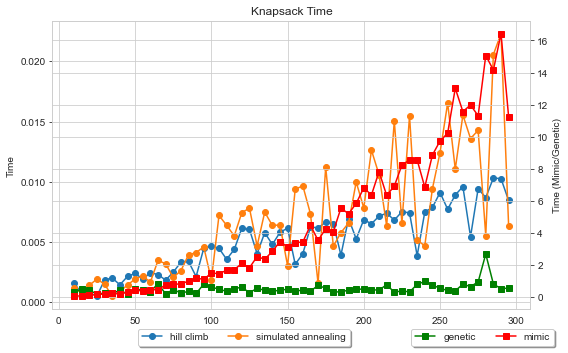

<Figure size 432x288 with 0 Axes>

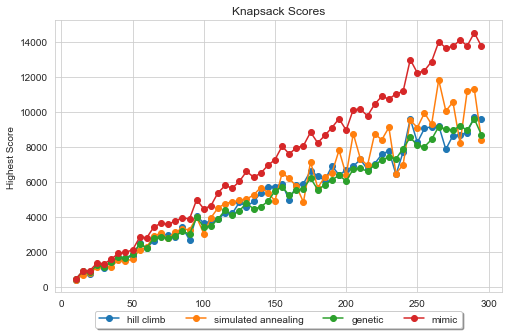

In [232]:
algorithm_RHC_score = []
algorithm_anneal_score = []
algorithm_genetic_score = []
algorithm_mimic_score = []
algorithm_RHC_time = []
algorithm_anneal_time = []
algorithm_genetic_time = []
algorithm_mimic_time = []
final_RHC_state=[]
final_anneal_state=[]
final_gen_state=[]
final_mimic_state=[]

final_curve("knap")

Four Peak Problem with  10  points
Four Peak Problem with  15  points
Four Peak Problem with  20  points
Four Peak Problem with  25  points
Four Peak Problem with  30  points
Four Peak Problem with  35  points
Four Peak Problem with  40  points
Four Peak Problem with  45  points
Four Peak Problem with  50  points
Four Peak Problem with  55  points
Four Peak Problem with  60  points
Four Peak Problem with  65  points
Four Peak Problem with  70  points
Four Peak Problem with  75  points
Four Peak Problem with  80  points
Four Peak Problem with  85  points
Four Peak Problem with  90  points
Four Peak Problem with  95  points
Four Peak Problem with  100  points
Four Peak Problem with  105  points
Four Peak Problem with  110  points
Four Peak Problem with  115  points
Four Peak Problem with  120  points
Four Peak Problem with  125  points
Four Peak Problem with  130  points
Four Peak Problem with  135  points
Four Peak Problem with  140  points
Four Peak Problem with  145  points
Four Peak 

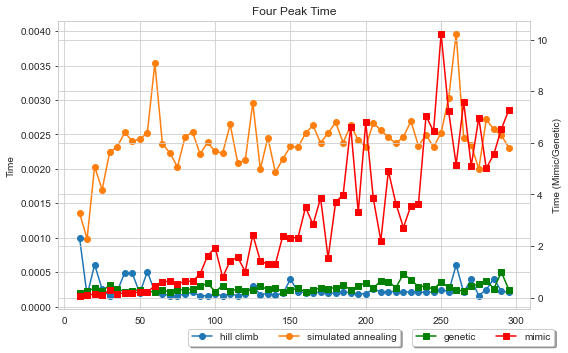

<Figure size 432x288 with 0 Axes>

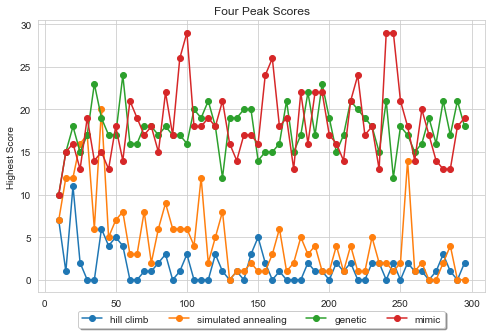

In [235]:
algorithm_RHC_score = []
algorithm_anneal_score = []
algorithm_genetic_score = []
algorithm_mimic_score = []
algorithm_RHC_time = []
algorithm_anneal_time = []
algorithm_genetic_time = []
algorithm_mimic_time = []

final_curve("four_peaks")

Continuous Peaks Problem with  10  points
Continuous Peaks Problem with  15  points
Continuous Peaks Problem with  20  points
Continuous Peaks Problem with  25  points
Continuous Peaks Problem with  30  points
Continuous Peaks Problem with  35  points
Continuous Peaks Problem with  40  points
Continuous Peaks Problem with  45  points
Continuous Peaks Problem with  50  points
Continuous Peaks Problem with  55  points
Continuous Peaks Problem with  60  points
Continuous Peaks Problem with  65  points
Continuous Peaks Problem with  70  points
Continuous Peaks Problem with  75  points
Continuous Peaks Problem with  80  points
Continuous Peaks Problem with  85  points
Continuous Peaks Problem with  90  points
Continuous Peaks Problem with  95  points
Continuous Peaks Problem with  100  points
Continuous Peaks Problem with  105  points
Continuous Peaks Problem with  110  points
Continuous Peaks Problem with  115  points
Continuous Peaks Problem with  120  points
Continuous Peaks Problem with

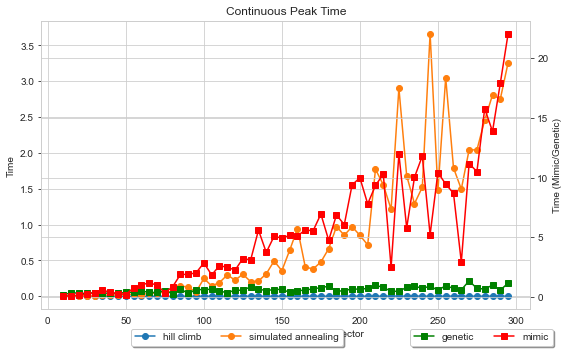

<Figure size 432x288 with 0 Axes>

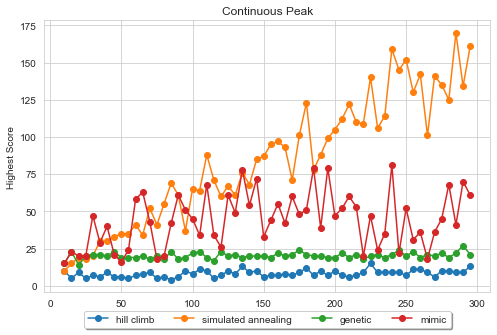

In [236]:
algorithm_RHC_score = []
algorithm_anneal_score = []
algorithm_genetic_score = []
algorithm_mimic_score = []
algorithm_RHC_time = []
algorithm_anneal_time = []
algorithm_genetic_time = []
algorithm_mimic_time = []

final_curve("continuous_peaks")

# DATA PRE-PROCESSING

In [5]:
#Telecom Churn Data Set
df=pd.read_csv ("Churn_Telecom.csv")
df.pop('customerID')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
df.dropna(inplace = True)
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
df_1 = pd.get_dummies(df)
X,y = df_1.drop(['Churn'], axis=1),df_1['Churn']
X = df_1
X.pop('Churn')
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns=features


# NEURAL NETWORK

In [400]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

with open('Neural-RHC.csv', 'w') as f:
    f.write('iteration,error_train,error_test,accuracy_train,accuracy_test,time\n')

for a in range(1, 1001, 5):
    start = time.perf_counter()
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes=[100, 100], activation='sigmoid',
                              algorithm='random_hill_climb',
                              is_classifier=True, early_stopping=True,
                              random_state=0, restarts=1
                              )
    nn_rhc.fit(X_train, y_train)
    y_pred = nn_rhc.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_rhc.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()

    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{}\n'.format(
        a, mse_train,mse_test, nn_acc_train,nn_acc,elapsed_time)
    with open('Neural-RHC.csv', 'a') as f:
        f.write(data_str)

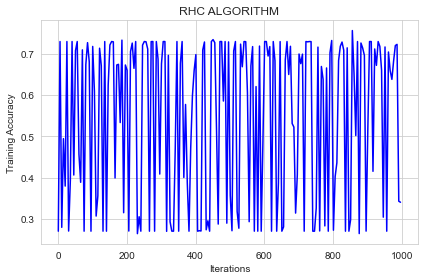

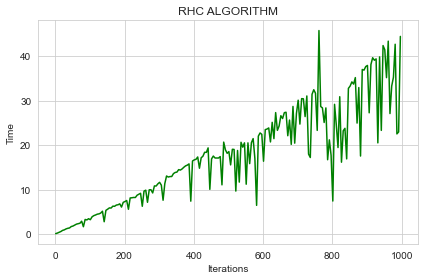

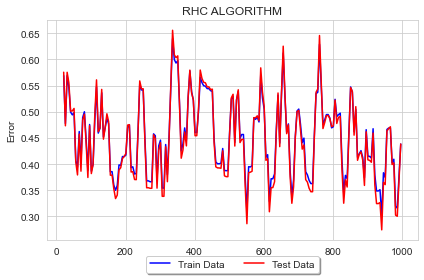

In [476]:
df_nn=pd.read_csv ("Neural-RHC1.csv")
#plt.plot(df_nn.iteration,'r-', color='r', label='Test F1 Score')
plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn.accuracy_train,'r', color='b')
#plt.plot(df_nn.iteration,df_nn.accuracy_test,'r-', color='r', label='Test Accuracy Score')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.title("RHC ALGORITHM")
#plt.legend(loc="upper right")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn.time,'r-', color='g')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title("RHC ALGORITHM")
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn['error_train'].rolling(window=5).mean(),'r-', color='b',label='Train Data')
plt.plot(df_nn.iteration,df_nn['error_test'].rolling(window=5).mean(),'r-', color='r',label='Test Data')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title("RHC ALGORITHM")
#plt.legend(loc="upper right")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()


In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)



with open('Neural-SAN.csv', 'w') as f:
    f.write('iteration,error_train,error_test,accuracy_train,accuracy_test,time,min_temp\n')

for a in range(1, 1001, 5):
    start = time.perf_counter()
    #nn = mlrose.NeuralNetwork(hidden_nodes=[100, 100], activation='identity',algorithm='simulated_annealing', is_classifier=True,early_stopping=True, random_state=0,schedule=mlrose.GeomDecay(init_temp=1E12,min_temp=0.001,decay=0.2
    mintemp=(a/5) 
    nn_san = mlrose.NeuralNetwork(hidden_nodes=[100, 100], activation='identity',
                              algorithm='simulated_annealing',
                              is_classifier=True, early_stopping=True,
                              random_state=0, restarts=1,
                              schedule=mlrose.GeomDecay(init_temp=a, decay=0.95, min_temp=mintemp))              
    
    nn_san.fit(X_train, y_train)
    y_pred = nn_san.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_san.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()
    

    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{},{}\n'.format(
        a, mse_train, mse_test, nn_acc_train, nn_acc, elapsed_time,mintemp)
    with open('Neural-SAN.csv', 'a') as f:
        f.write(data_str)
        
  

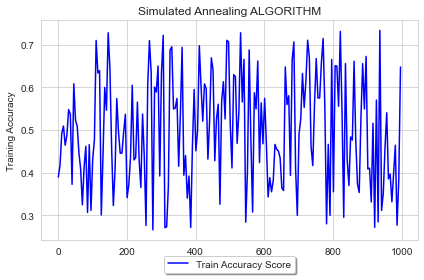

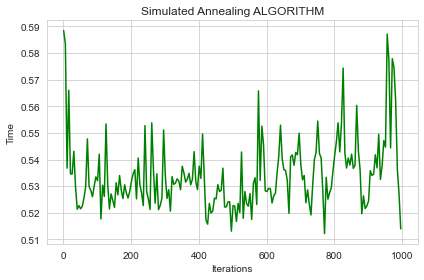

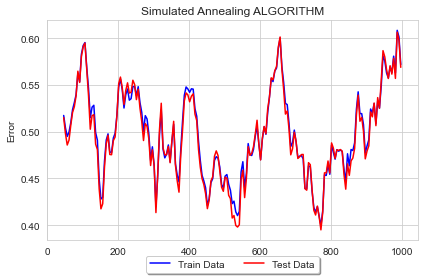

In [468]:
df_nn=pd.read_csv ("Neural-SAN.csv")
plt.figure(figsize=(6,4))
#plt.plot(df_nn.iteration,'r-', color='r', label='Test F1 Score')
plt.plot(df_nn.iteration,df_nn.accuracy_train,'r-', color='b', label='Train Accuracy Score')
#plt.plot(df_nn.iteration,df_nn.accuracy_test,'r-', color='b', label='Test Accuracy Score')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.title("Simulated Annealing ALGORITHM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn.time,'r-', color='g')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title("Simulated Annealing ALGORITHM")
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn['error_train'].rolling(window=10).mean(),'r-', color='b',label='Train Data')
plt.plot(df_nn.iteration,df_nn['error_test'].rolling(window=10).mean(),'r-', color='r',label='Test Data')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title("Simulated Annealing ALGORITHM")
#plt.legend(loc="upper right")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

with open('Neural-GENETIC.csv', 'w') as f:
    f.write('iteration,error_train,error_test,accuracy_train,accuracy_test,time\n')

for a in range(1, 1001, 5):
    start = time.perf_counter()
    #nn = mlrose.NeuralNetwork(hidden_nodes=[], activation='identity',algorithm='genetic_alg', is_classifier=True,early_stopping=True, random_state=0,pop_size=200,mutation_prob=0.1)
    
    nn_gen = mlrose.NeuralNetwork(hidden_nodes=[100, 100], activation='identity',
                              algorithm='genetic_alg', is_classifier=True,
                              early_stopping=True, random_state=0,
                              pop_size=200,
                              mutation_prob=a/1000)        
    
    nn_gen.fit(X_train, y_train)
    y_pred = nn_gen.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_gen.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()

    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{}\n'.format(
        a, mse_train, mse_test, nn_acc_train, nn_acc, elapsed_time)
    with open('Neural-GENETIC.csv', 'a') as f:
        f.write(data_str)

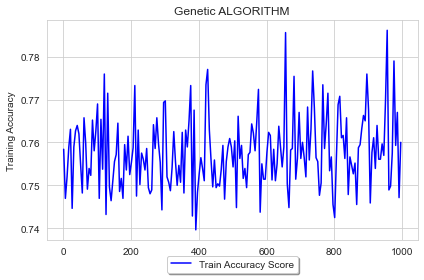

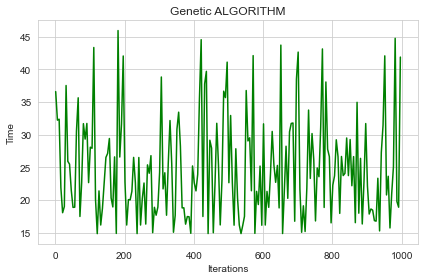

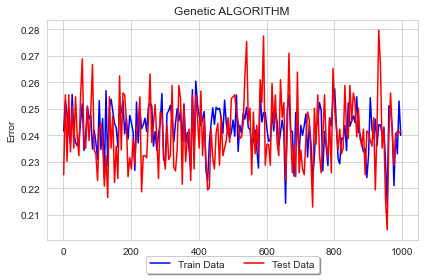

In [196]:
df_nn=pd.read_csv ("Neural-GENETIC.csv")
plt.figure(figsize=(6,4))
#plt.plot(df_nn.iteration,'r-', color='r', label='Test F1 Score')
plt.plot(df_nn.iteration,df_nn.accuracy_train,'r-', color='b', label='Train Accuracy Score')
#plt.plot(df_nn.iteration,df_nn.accuracy_test,'r-', color='r', label='Test Accuracy Score')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Training Accuracy')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
#plt.legend(loc="upper right")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn.time,'r-', color='g')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.iteration,df_nn.error_train,'r-', color='b',label='Train Data')
plt.plot(df_nn.iteration,df_nn.error_test,'r-', color='r',label='Test Data')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()





In [474]:
df_rhc=pd.read_csv ("Neural-RHC1.csv")

In [516]:
df_genetic.columns

Index(['iteration', 'error_train', 'error_test', 'accuracy_train',
       'accuracy_test', 'time'],
      dtype='object')

In [ ]:
df_genetic=pd.read_csv ("Neural-GENETIC.csv")
df_rhc=pd.read_csv ("Neural-RHC.csv")
df_san=pd.read_csv ("Neural-SAN.csv")




plt.ylabel('Timing')
plt.xlabel('Iterations')
plt.title("Comparasion")

plt.plot(df_genetic.iteration,df_genetic['error_train'].rolling(window=10).mean(), 'r', color="b", label="Genetic Alogrithm")
plt.plot(df_rhc.iteration, df_rhc['error_train'].rolling(window=10).mean(), 'r', color="r", label="RHC Alogrithm")
plt.plot(df_san.iteration, df_san['error_train'].rolling(window=10).mean(), 'r', color="g", label="SAN Alogrithm")
#plt.plot(df_nn.iteration, cv_mean, 'o-', color="r", label="Cross-Validation Score
    
#plt.legend(loc="lower left")
#plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc='lower left', bbox_to_anchor= (1.25, -0.3), ncol=2,
          
plt.tight_layout()

In [503]:
df_genetic[df_genetic['accuracy_train']==df_genetic['accuracy_train'].max()]

,iteration,error_train,error_test,accuracy_train,accuracy_test,time
191,956,0.213799,0.204301,0.786201,0.795699,20.755681


In [140]:
df_san[df_san['accuracy_train']==df_san['accuracy_train'].max()]

,iteration,error_train,error_test,accuracy_train,accuracy_test,time,min_temp
187,936,0.266487,0.24086,0.733513,0.75914,0.532511,187.2


In [475]:
df_rhc[df_rhc['accuracy_train']==df_rhc['accuracy_train'].max()]

,iteration,error_train,error_test,accuracy_train,accuracy_test,time
171,856,0.244444,0.225806,0.755556,0.774194,34.226692


(<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/Iris_Project/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 array([[0.41577061, 0.61003584, 0.27311828, 0.50752688, 0.73261649],
        [0.30537634, 0.36917563, 0.45448029, 0.65304659, 0.57060932],
        [0.7218638 , 0.6437276 , 0.26523297, 0.60573477, 0.72688172],
        [0.5218638 , 0.31684588, 0.26523297, 0.70967742, 0.38996416],
        [0.51397849, 0.72329749, 0.38853047, 0.64874552, 0.2781362 ],
        [0.66594982, 0.4       , 0.72043011, 0.27383513, 0.63870968],
        [0.28387097, 0.58136201, 0.73333333, 0.31039427, 0.59928315],
        [0.54480287, 0.70250896, 0.63154122, 0.49247312, 0.36487455],
        [0.26523297, 0.61362007, 0.46953405, 0.69032258, 0.64659498],
        [0.28243728, 0.54623656, 0.69892473, 0.27598566, 0.49103943],
        [0.73476703, 0.59139785, 0.38709677, 0.54623656, 0.26379928],
        [0.2688172 , 0.67383513, 0.51182796, 0.43870968, 0.51541219],
        [0.69175627, 0.5483871 , 0.55340

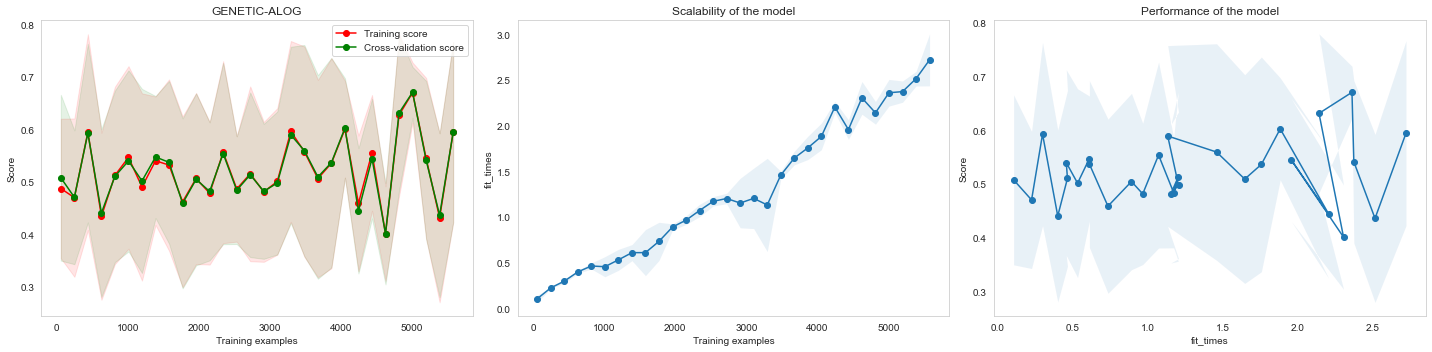

In [238]:
plot_learning_curve(nn_gen,"GENETIC-ALOG",X,y)

(<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/Iris_Project/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 array([[0.26523297, 0.32831541, 0.73476703, 0.28387097, 0.33620072],
        [0.54551971, 0.49820789, 0.71827957, 0.71326165, 0.32401434],
        [0.2702509 , 0.41290323, 0.49892473, 0.50896057, 0.73405018],
        [0.68458781, 0.55555556, 0.49677419, 0.73261649, 0.63297491],
        [0.62939068, 0.37562724, 0.39498208, 0.62293907, 0.42939068],
        [0.26523297, 0.37204301, 0.72831541, 0.26953405, 0.70322581],
        [0.35483871, 0.62867384, 0.65519713, 0.70179211, 0.72903226],
        [0.46738351, 0.29318996, 0.58996416, 0.33978495, 0.42078853],
        [0.30609319, 0.73476703, 0.30322581, 0.30035842, 0.60501792],
        [0.26523297, 0.30681004, 0.46810036, 0.26594982, 0.54623656],
        [0.35483871, 0.62508961, 0.29175627, 0.37921147, 0.49677419],
        [0.43082437, 0.33691756, 0.48817204, 0.47096774, 0.36057348],
        [0.6437276 , 0.53978495, 0.52258

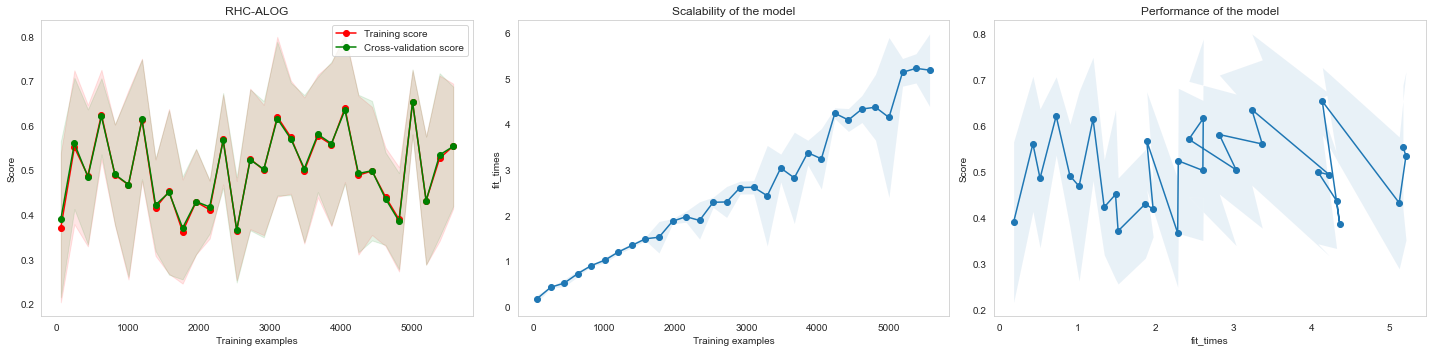

In [407]:
plot_learning_curve(nn_rhc,"RHC-ALOG",X,y)

(<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/Iris_Project/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 array([[0.45304659, 0.24946237, 0.46810036, 0.42150538, 0.6953405 ],
        [0.26953405, 0.26523297, 0.48673835, 0.72043011, 0.3827957 ],
        [0.52258065, 0.32544803, 0.27885305, 0.41362007, 0.26236559],
        [0.4702509 , 0.73046595, 0.27741935, 0.33046595, 0.53763441],
        [0.63655914, 0.60501792, 0.27455197, 0.27455197, 0.32831541],
        [0.72258065, 0.50250896, 0.32401434, 0.73333333, 0.37491039],
        [0.61433692, 0.72473118, 0.36845878, 0.4265233 , 0.65304659],
        [0.27168459, 0.33620072, 0.26810036, 0.31899642, 0.52401434],
        [0.71684588, 0.46379928, 0.7046595 , 0.67741935, 0.61075269],
        [0.66594982, 0.48817204, 0.69605735, 0.4172043 , 0.33548387],
        [0.71469534, 0.73476703, 0.7297491 , 0.47741935, 0.71397849],
        [0.51899642, 0.31469534, 0.31039427, 0.7297491 , 0.45232975],
        [0.65448029, 0.6874552 , 0.42795

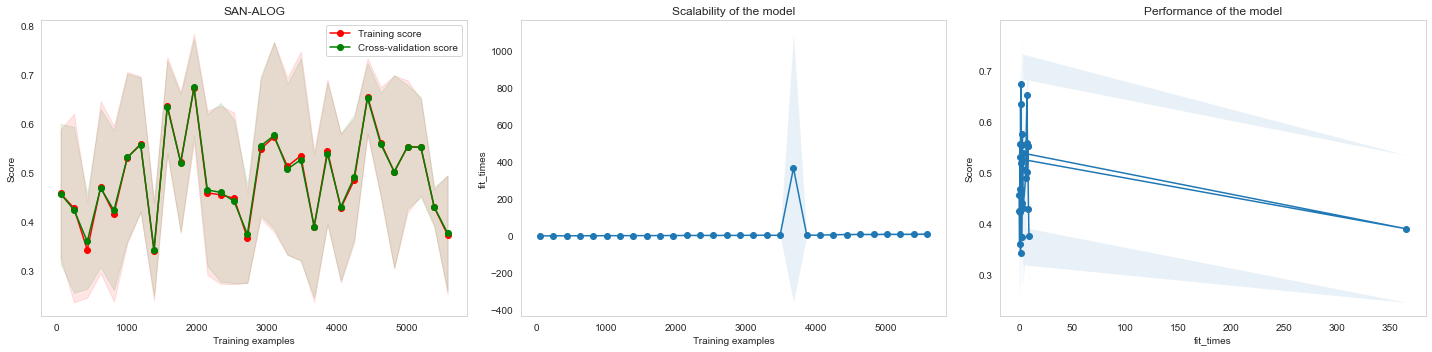

In [241]:
plot_learning_curve(nn_san,"SAN-ALOG",X,y)

In [453]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

with open('Neural-SANA.csv', 'w') as f:
    f.write('error_train,error_test,accuracy_train,accuracy_test,time,decay\n')

for t in np.linspace(.1, 1.0, 60):
    start = time.perf_counter()
    ndecay=t
    nn_san1 = mlrose.NeuralNetwork(hidden_nodes=[], activation='identity',
                              algorithm='simulated_annealing',
                              is_classifier=True, early_stopping=True,
                              random_state=0, restarts=1,
                              schedule=mlrose.GeomDecay(decay=ndecay))              
    
    nn_san1.fit(X_train, y_train)
    y_pred = nn_san1.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_san1.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()
        #nn_acc_train.append(accuracy_score(y_train, y_pred_train))


    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{}\n'.format(
        mse_train, mse_test, nn_acc_train, nn_acc, elapsed_time,ndecay)
    with open('Neural-SANA.csv', 'a') as f:
        f.write(data_str)
        

In [454]:
df1_san=pd.read_csv ("Neural-SANA.csv")

In [456]:
print(df1_san)

    error_train  error_test  accuracy_train  accuracy_test      time     decay
0      0.334767    0.332616        0.665233       0.667384  0.245904  0.100000
1      0.261470    0.261649        0.738530       0.738351  0.229660  0.115254
2      0.616667    0.597133        0.383333       0.402867  0.232326  0.130508
3      0.296237    0.267384        0.703763       0.732616  0.233720  0.145763
4      0.387276    0.382079        0.612724       0.617921  0.227261  0.161017
5      0.467921    0.484588        0.532079       0.515412  0.218180  0.176271
6      0.451971    0.424373        0.548029       0.575627  0.206630  0.191525
7      0.326523    0.331183        0.673477       0.668817  0.224680  0.206780
8      0.350358    0.317563        0.649642       0.682437  0.235319  0.222034
9      0.512903    0.527599        0.487097       0.472401  0.208719  0.237288
10     0.417204    0.430108        0.582796       0.569892  0.237123  0.252542
11     0.349104    0.318996        0.650896       0.

In [455]:
df1_san[df1_san['accuracy_train']==df1_san['accuracy_train'].max()]

,error_train,error_test,accuracy_train,accuracy_test,time,decay
49,0.230108,0.245878,0.769892,0.754122,0.26646,0.847458


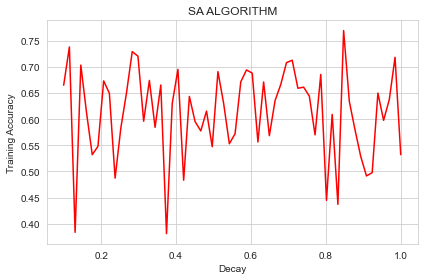

In [465]:

plt.figure(figsize=(6,4))
plt.plot(df1_san.decay,df1_san.accuracy_train,'r', color='r')
#plt.plot(df_nn.iteration,df_nn.accuracy_test,'r-', color='r', label='Test Accuracy Score')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Training Accuracy')
plt.xlabel('Decay')
plt.title("SA ALGORITHM")
#plt.legend(loc="upper right")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()


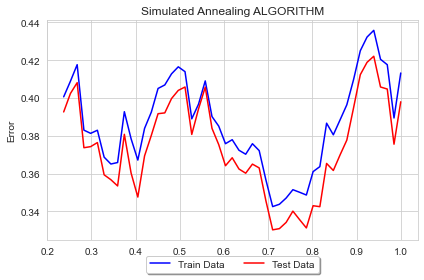

In [467]:
plt.figure(figsize=(6,4))
plt.plot(df1_san.decay,df1_san['error_train'].rolling(window=10).mean(),'r-', color='b',label='Train Data')
plt.plot(df1_san.decay,df1_san['error_test'].rolling(window=10).mean(),'r-', color='r',label='Test Data')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Error')
plt.xlabel('Decay')
plt.title("Simulated Annealing ALGORITHM")
#plt.legend(loc="upper right")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()



(<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/Iris_Project/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 array([[0.73691756, 0.76057348, 0.74193548, 0.64301075, 0.63082437],
        [0.75985663, 0.71756272, 0.65376344, 0.69390681, 0.72258065],
        [0.70394265, 0.65304659, 0.67096774, 0.72759857, 0.73835125],
        [0.69462366, 0.54551971, 0.62867384, 0.63154122, 0.65304659],
        [0.71971326, 0.53835125, 0.51612903, 0.71684588, 0.71326165],
        [0.68172043, 0.65519713, 0.68817204, 0.60645161, 0.56415771],
        [0.71827957, 0.44587814, 0.73620072, 0.49677419, 0.63942652],
        [0.68673835, 0.66594982, 0.67096774, 0.26164875, 0.60143369],
        [0.6781362 , 0.70824373, 0.4702509 , 0.66308244, 0.37562724],
        [0.70322581, 0.59139785, 0.55053763, 0.4265233 , 0.62724014],
        [0.59713262, 0.58781362, 0.45806452, 0.44301075, 0.64516129],
        [0.63082437, 0.52544803, 0.69175627, 0.68530466, 0.60430108],
        [0.7046595 , 0.64587814, 0.71541

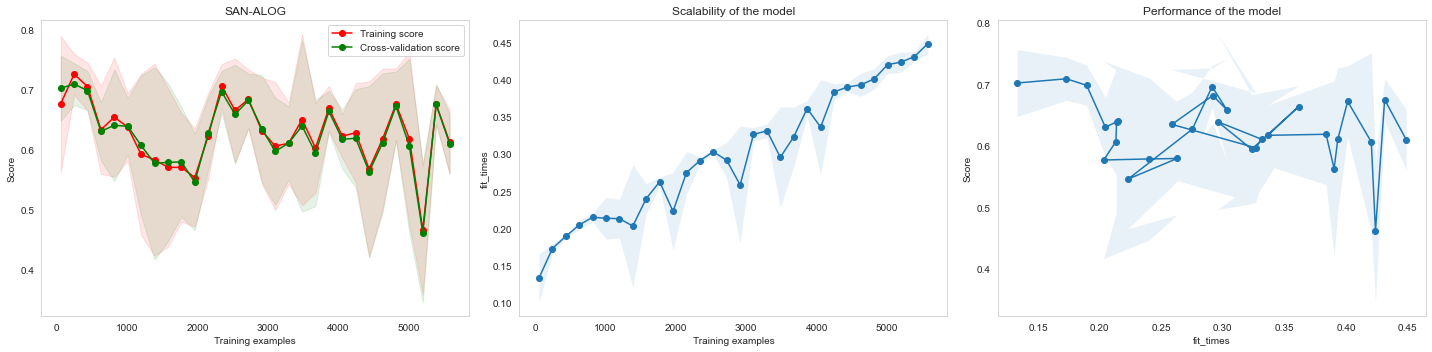

In [470]:
plot_learning_curve(nn_san1,"SAN-ALOG",X,y)

In [472]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

with open('Neural-RHC1.csv', 'w') as f:
    f.write('iteration,error_train,error_test,accuracy_train,accuracy_test,time\n')

for a in range(1, 1001, 5):
    start = time.perf_counter()
    nn_rhc = mlrose.NeuralNetwork(hidden_nodes=[100, 100], activation='sigmoid',
                              algorithm='random_hill_climb',max_iters=a,
                              is_classifier=True, early_stopping=True,
                              random_state=0, restarts=1
                              )
    nn_rhc.fit(X_train, y_train)
    y_pred = nn_rhc.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_rhc.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()

    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{}\n'.format(
        a, mse_train,mse_test, nn_acc_train,nn_acc,elapsed_time)
    with open('Neural-RHC1.csv', 'a') as f:
        f.write(data_str)

(<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/Iris_Project/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 array([[0.28100358, 0.26953405, 0.70179211, 0.4953405 , 0.3921147 ],
        [0.2702509 , 0.47240143, 0.36989247, 0.64731183, 0.56487455],
        [0.47096774, 0.29749104, 0.63584229, 0.64229391, 0.66236559],
        [0.2688172 , 0.67455197, 0.54623656, 0.37419355, 0.71684588],
        [0.6516129 , 0.37060932, 0.33333333, 0.27383513, 0.66810036],
        [0.35842294, 0.53333333, 0.61218638, 0.44157706, 0.27598566],
        [0.26953405, 0.32544803, 0.65949821, 0.73405018, 0.57491039],
        [0.49462366, 0.66953405, 0.69892473, 0.71971326, 0.65519713],
        [0.55125448, 0.27526882, 0.2702509 , 0.38422939, 0.62437276],
        [0.62150538, 0.63942652, 0.62078853, 0.67598566, 0.54336918],
        [0.55985663, 0.47670251, 0.27670251, 0.68817204, 0.45232975],
        [0.57777778, 0.57992832, 0.27240143, 0.6874552 , 0.65304659],
        [0.60430108, 0.34623656, 0.26881

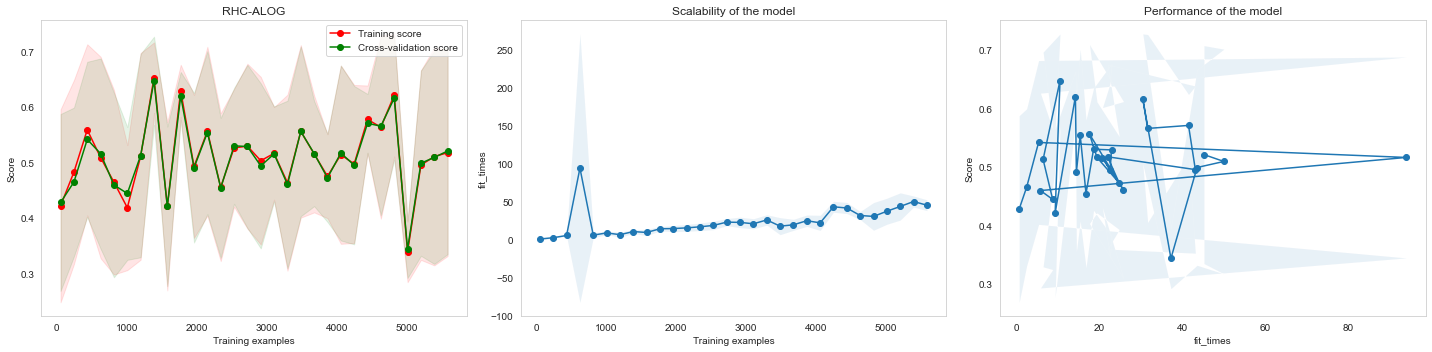

In [473]:
plot_learning_curve(nn_rhc,"RHC-ALOG",X,y)

In [494]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

with open('Neural-GENETIC1.csv', 'w') as f:
    f.write('error_train,error_test,accuracy_train,accuracy_test,time,mutation_prob\n')

for a in np.linspace(0.1, 1, 100):
    start = time.perf_counter()
    mutprob=a
    #nn = mlrose.NeuralNetwork(hidden_nodes=[], activation='identity',algorithm='genetic_alg', is_classifier=True,early_stopping=True, random_state=0,pop_size=200,mutation_prob=0.1)
    
    nn_gen = mlrose.NeuralNetwork(hidden_nodes=[], activation='identity',
                              algorithm='genetic_alg', is_classifier=True,
                              early_stopping=True, random_state=0,
                              pop_size=200,
                              mutation_prob=mutprob)        
    
    nn_gen.fit(X_train, y_train)
    y_pred = nn_gen.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_gen.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()

    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{}\n'.format(
        mse_train, mse_test, nn_acc_train, nn_acc, elapsed_time,mutprob)
    with open('Neural-GENETIC1.csv', 'a') as f:
        f.write(data_str)

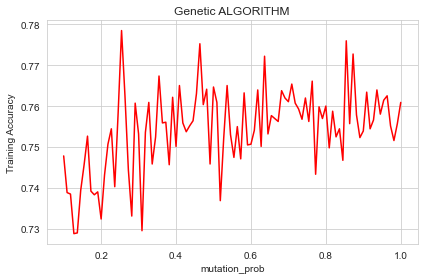

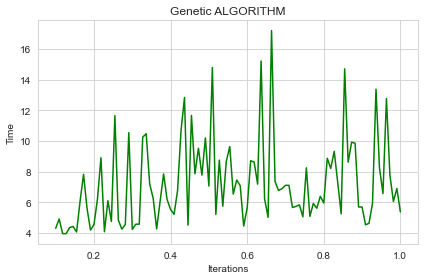

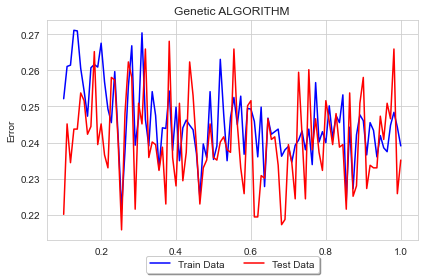

In [502]:
df_nn=pd.read_csv ("Neural-GENETIC1.csv")
plt.figure(figsize=(6,4))
#plt.plot(df_nn.iteration,'r-', color='r', label='Test F1 Score')
plt.plot(df_nn.mutation_prob,df_nn.accuracy_train,'r-', color='r')
#plt.plot(df_nn.iteration,df_nn.accuracy_test,'r-', color='r', label='Test Accuracy Score')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Training Accuracy')
plt.xlabel('mutation_prob')
plt.title("Genetic ALGORITHM")
#plt.legend(loc="upper right")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.mutation_prob,df_nn.time,'r-', color='g')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.mutation_prob,df_nn.error_train,'r-', color='b',label='Train Data')
plt.plot(df_nn.mutation_prob,df_nn.error_test,'r-', color='r',label='Test Data')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



(<module 'matplotlib.pyplot' from '/opt/anaconda3/envs/Iris_Project/lib/python3.8/site-packages/matplotlib/pyplot.py'>,
 array([[0.58853047, 0.69318996, 0.6781362 , 0.63727599, 0.66308244],
        [0.74767025, 0.76702509, 0.44157706, 0.53763441, 0.59928315],
        [0.76415771, 0.66379928, 0.63010753, 0.62150538, 0.70035842],
        [0.7046595 , 0.67168459, 0.67240143, 0.48028674, 0.57777778],
        [0.55412186, 0.44229391, 0.66594982, 0.36989247, 0.69318996],
        [0.33405018, 0.62150538, 0.71612903, 0.75268817, 0.54265233],
        [0.61075269, 0.7218638 , 0.50035842, 0.52616487, 0.40430108],
        [0.5218638 , 0.6078853 , 0.55985663, 0.51899642, 0.52688172],
        [0.6781362 , 0.68673835, 0.43727599, 0.62222222, 0.62365591],
        [0.36774194, 0.49749104, 0.65376344, 0.69749104, 0.6516129 ],
        [0.61577061, 0.48530466, 0.56989247, 0.64086022, 0.2781362 ],
        [0.50322581, 0.68172043, 0.64444444, 0.73333333, 0.75913978],
        [0.54193548, 0.32831541, 0.54336

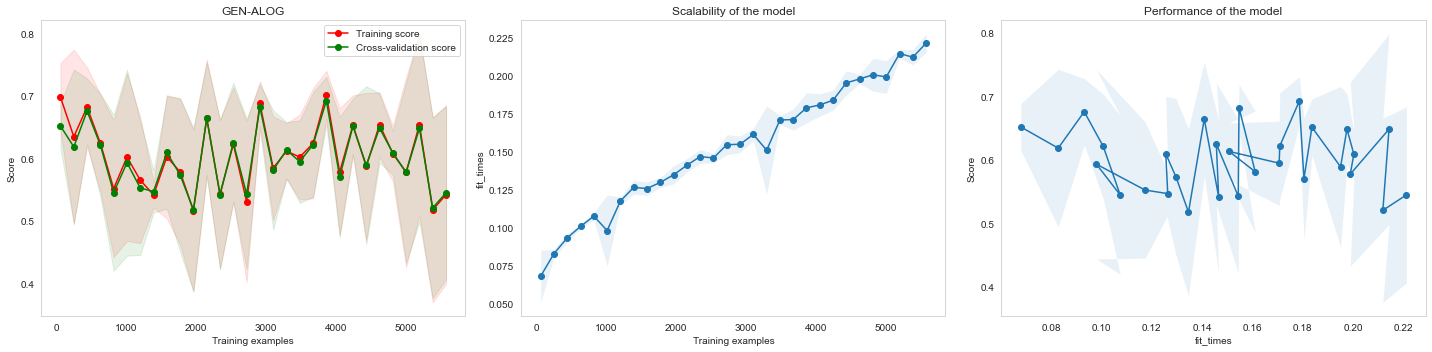

In [498]:
plot_learning_curve(nn_gen,"GEN-ALOG",X,y)

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

with open('Neural-GENETIC2.csv', 'w') as f:
    f.write('error_train,error_test,accuracy_train,accuracy_test,time,prob_size\n')

for a in range(200, 1000, 40):
    start = time.perf_counter()
    mutprob=a
    #nn = mlrose.NeuralNetwork(hidden_nodes=[], activation='identity',algorithm='genetic_alg', is_classifier=True,early_stopping=True, random_state=0,pop_size=200,mutation_prob=0.1)
    
    nn_gen = mlrose.NeuralNetwork(hidden_nodes=[], activation='identity',
                              algorithm='genetic_alg', is_classifier=True,
                              early_stopping=True, random_state=0,
                              pop_size=a
                              )        
    
    nn_gen.fit(X_train, y_train)
    y_pred = nn_gen.predict(X_test)
    nn_acc = accuracy_score(y_test, y_pred)
    y_pred_train = nn_gen.predict(X_train)
    nn_acc_train = accuracy_score(y_train, y_pred_train)
    end = time.perf_counter()

    elapsed_time = end - start
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred)

    data_str = '{},{},{},{},{},{}\n'.format(
        mse_train, mse_test, nn_acc_train, nn_acc, elapsed_time,mutprob)
    with open('Neural-GENETIC2.csv', 'a') as f:
        f.write(data_str)

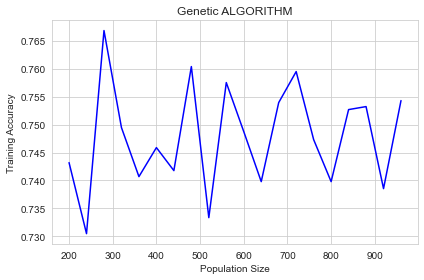

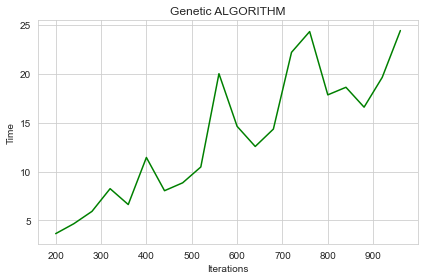

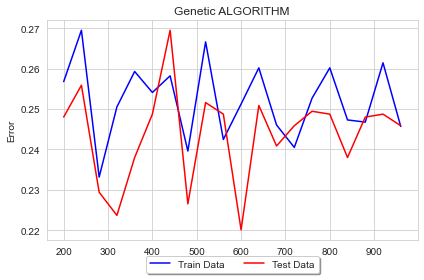

In [501]:
df_nn=pd.read_csv ("Neural-GENETIC2.csv")
plt.figure(figsize=(6,4))
#plt.plot(df_nn.iteration,'r-', color='r', label='Test F1 Score')
plt.plot(df_nn.prob_size,df_nn.accuracy_train,'r-', color='b')
#plt.plot(df_nn.iteration,df_nn.accuracy_test,'r-', color='r', label='Test Accuracy Score')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Training Accuracy')
plt.xlabel('Population Size')
plt.title("Genetic ALGORITHM")
#plt.legend(loc="upper right")
#plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.prob_size,df_nn.time,'r-', color='g')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Time')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df_nn.prob_size,df_nn.error_train,'r-', color='b',label='Train Data')
plt.plot(df_nn.prob_size,df_nn.error_test,'r-', color='r',label='Test Data')
#plt.plot(rhc_best_state,'r-', color='b', label='Test F1 Score')
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title("Genetic ALGORITHM")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
#plt.legend(loc="upper right")
plt.tight_layout()
plt.show()



# Population Size for Genetic Algorithm

In [505]:
df_genetic=pd.read_csv("Neural-GENETIC2.csv")
df_genetic[df_genetic['accuracy_train']==df_genetic['accuracy_train'].max()]

,error_train,error_test,accuracy_train,accuracy_test,time,prob_size
2,0.233154,0.229391,0.766846,0.770609,5.925887,280


# Mutation Probability for Genetic Algorithm


In [506]:
df_genetic=pd.read_csv("Neural-GENETIC1.csv")
df_genetic[df_genetic['accuracy_train']==df_genetic['accuracy_train'].max()]

,error_train,error_test,accuracy_train,accuracy_test,time,mutation_prob
17,0.221505,0.215771,0.778495,0.784229,11.6521,0.254545


# Random Hill Climbing based on 

In [511]:
df_genetic=pd.read_csv("Neural-RHC1.csv")
df_genetic[df_genetic['accuracy_train']==df_genetic['accuracy_train'].max()]

,iteration,error_train,error_test,accuracy_train,accuracy_test,time
171,856,0.244444,0.225806,0.755556,0.774194,34.226692


# Simulated Annealing with Cooling Component


In [512]:
df_genetic=pd.read_csv("Neural-SANA.csv")
df_genetic[df_genetic['accuracy_train']==df_genetic['accuracy_train'].max()]

,error_train,error_test,accuracy_train,accuracy_test,time,decay
49,0.230108,0.245878,0.769892,0.754122,0.26646,0.847458
